In [1]:
import importlib
import scripts.gen_model
from scripts.reaction_utils import list_blocked_reactions
from scripts.metabolite_utils import remove_orphan_metabolites
from thermo_flux.tools.drg_tools import reaction_balance
from thermo_flux.tools.drg_tools import calc_model_drG0prime

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


In [2]:
INPUT_MODEL = "datafiles/model.xlsx"
INPUT_KEGGS = "datafiles/ecoli_kegg_id.csv"
INPUT_REED = "regression/reed.csv"
INPUT_INCHI = "regression/InChIs.csv"
INPUT_GAMS = "regression/model_Ecoli_from-gams.xlsx"
INPUT_EXP_DATA = "regression/allPhysioData_formatted_forGSM_20230831.csv"
INPUT_EXP_CONC = "regression/allConcRange_20230912.csv"
INPUT_METABOLOMICS = "regression/metabolomics-Kochanowski_20230925.csv"

In [3]:
importlib.reload(scripts.gen_model)

<module 'scripts.gen_model' from '/home/laurens/MSC-Thermo/scripts/gen_model.py'>

In [3]:
tmodel = scripts.gen_model.gen_model_from_core("ecoli", INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, True, True)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Initializing component contribution object...
cxcalc is not installed, operating in read-only mode. A local cache may be loaded, but no compounds can be created. Install cxcalc and obtain a ChemAxon license to enable compound creation.
Loading compounds from e_coli_core_compound.sqlite
added reaction:  biomass_ce: biomass_c <=> biomass_e
added reaction:  biomass_EX: biomass_e <=> 
added reaction:  charge_ce: charge_e <=> charge_c
added reaction:  EX_charge: charge_e <=> 
['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
BIOMASS_Ec

In [5]:
print(len(tmodel.reactions))
for r in tmodel.reactions:
    print(r)

print(len(tmodel.metabolites))
for m in tmodel.metabolites:
    print(m)

99
PFK: atp_c + f6p_c --> adp_c + fdp_c + h_c
PFL: coa_c + pyr_c --> accoa_c + for_c
PGI: g6p_c <=> f6p_c
PGK: 3pg_c + atp_c <=> 13dpg_c + adp_c
PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c
ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
AKGt2r: akg_e + charge_c + h_e <=> akg_c + charge_e + h_c
PGM: 2pg_c <=> 3pg_c
PIt2r: charge_c + 0.845221 h_e + pi_e <=> charge_e + h_c + pi_c
ALCD2x: etoh_c + nad_c <=> acald_c + h_c + nadh_c
ACALDt: acald_e <=> acald_c
ACKr: ac_c + atp_c <=> actp_c + adp_c
PPC: co2_c + h2o_c + pep_c --> h_c + oaa_c + pi_c
ACONTa: cit_c <=> acon_C_c + h2o_c
ACONTb: acon_C_c + h2o_c <=> icit_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
PPCK: atp_c + oaa_c --> adp_c + co2_c + pep_c
ACt2r: ac_e + h_e <=> ac_c + h_c
PPS: atp_c + h2o_c + pyr_c --> amp_c + 2.0 h_c + pep_c + pi_c
ADK1: amp_c + atp_c <=> 2.0 adp_c
AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
ATPS4r: adp_c + 4.0 charge_e + 4.0 h_e + pi_c <=> atp_c + 4.0 charge_c + h2o_c + 3.0 h_c
PTAr: accoa_c 

In [6]:
for rxn in tmodel.reactions:
    print(rxn.id, round(rxn.drG0prime.m,3),'±', round(rxn.drG_SE, 3))

PFK -19.765 ± 0.675 kilojoule / mole
PFL -19.769 ± 1.489 kilojoule / mole
PGI 2.63 ± 0.383 kilojoule / mole
PGK 19.524 ± 0.441 kilojoule / mole
PGL -26.794 ± 1.659 kilojoule / mole
ACALD -22.046 ± 1.2 kilojoule / mole
AKGt2r 13.922 ± 0.0 kilojoule / mole
PGM -4.485 ± 0.361 kilojoule / mole
PIt2r 3.745 ± 0.0 kilojoule / mole
ALCD2x 16.647 ± 0.323 kilojoule / mole
ACALDt 13.921 ± 0.0 kilojoule / mole
ACKr 13.918 ± 0.55 kilojoule / mole
PPC -41.529 ± 3.112 kilojoule / mole
ACONTa 8.354 ± 1.134 kilojoule / mole
ACONTb -1.642 ± 1.135 kilojoule / mole
ATPM -30.988 ± 0.304 kilojoule / mole
PPCK 10.541 ± 3.12 kilojoule / mole
ACt2r 10.444 ± 0.0 kilojoule / mole
PPS -7.787 ± 0.498 kilojoule / mole
ADK1 0.358 ± 0.16 kilojoule / mole
AKGDH -28.183 ± 3.885 kilojoule / mole
ATPS4r 30.988 ± 0.304 kilojoule / mole
PTAr 8.561 ± 0.606 kilojoule / mole
PYK -23.559 ± 0.424 kilojoule / mole
BIOMASS_Ecoli_core_w_GAM 3629.081 ± 19.273 kilojoule / mole
PYRt2 10.441 ± 0.0 kilojoule / mole
CO2t 0.0 ± 0.0 kiloj

In [4]:
blocked_p = list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
remove_orphan_metabolites(tmodel)
for rxn in tmodel.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)

['EX_fru_e', 'EX_fum_e', 'EX_gln__L_e', 'EX_mal__L_e', 'FRUpts2', 'FUMt2_2', 'GLNabc', 'MALt2_2', 'EX_charge']
9
9

Removing 2 orphan metabolites:
Orphaned IDs: Mg_c, Mg_e
Identifying compounds...
[████████████████████████████████████████] 72/72 charge_c                  

Estimating dfG0'...
[████████████████████████████████████████] 72/72 charge_c                  

Estimating drG0'...
[████████████████████████████████████████] 90/90 charge_ce                                



In [5]:
tmodel.objective = tmodel.reactions.biomass_EX
sol = tmodel.optimize()
tmodel.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.345,0,0.00%
o2_e,EX_o2_e,25.17,0,0.00%
pi_e,EX_pi_e,2.931,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-26.09,1,100.00%
h2o_e,EX_h2o_e,-31.89,0,0.00%
h_e,EX_h_e,-76.98,0,0.00%
biomass_e,biomass_EX,-0.7968,0,0.00%


In [56]:
from equilibrator_api import  Q_
tmodel.metabolites.atp_c.lower_bound = Q_(10, 'mM')
tmodel.metabolites.atp_c.upper_bound = Q_(10, 'mM')

tmodel.metabolites.glu__L_c.upper_bound = Q_(100, 'mM')

#metabolites could also be defined as ratios as long as they always appear in pairs and no biosynthesis reactions are present e.g. NAD and NADH

tmodel.metabolites.nad_c.upper_bound = Q_(20, 'M')
tmodel.metabolites.nad_c.lower_bound = Q_(10, 'M')

tmodel.metabolites.nadh_c.upper_bound = Q_(1, 'M')
tmodel.metabolites.nadh_c.lower_bound = Q_(1, 'M')

In [92]:
tmodel.m = None #reset the gurobi model object in case you're re-running this cell 
tmodel.add_TFBA_variables(gdiss_constraint = True, sigmac_limit = 12, error_type = 'covariance')
tmodel.m.Params.TimeLimit = 30
tmodel.m.optimize()


Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  30
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 835 rows, 774 columns and 5384 nonzeros
Model fingerprint: 0x2e5650b3
Model has 17 quadratic constraints
Model has 1 simple general constraint
  1 NORM
Variable types: 684 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+05]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+06]
  RHS range        [3e-14, 1e+05]
Presolve removed 434 rows

In [9]:
# All the TFBA variables are now stored in the tmodel.mvars dictionary
print(tmodel.mvars.keys())
# these are gurobi mvar objects and can be modified (e.g. lower and upper bounds start values etc.) using the.gurobipy api

# otherwise a solution dataframe is generated by tmodel.solution()
sol = tmodel.solution()

#create a list of internal and exchange reactions based on cobra boundary function 
int_rxns = [rxn.id for rxn  in tmodel.reactions if rxn not in tmodel.boundary]
ex_rxns = [rxn.id for rxn  in tmodel.reactions if rxn  in tmodel.boundary]

#index the solution dataframe using these lists and sum the gibbs energy dissipation 
print('Gdiss internal: ', sol.loc[int_rxns]['Gdiss'].sum())
print('Gdiss exchange: ', sol.loc[ex_rxns]['Gdiss'].sum())

display(sol)

dict_keys(['b', 'v', 'drGp', 'drGn', 'ln_conc', 'drG', 'drG_error', 'drG_conc', 'qm', 'mnorm', 'Gdiss', 'g_2'])
Gdiss internal:  -3637.7997195126277
Gdiss exchange:  3637.799720060482


,v,drG,Gdiss,drG0_prime,drG_error,drG_conc,b,condition
reaction,,,,,,,,
PFK,7.916408,-2.776341,-21.978646,-19.765170,0.096074,16.892755,1.0,0
PFL,5.987608,-8.870250,-53.111579,-19.769029,1.923816,8.974963,1.0,0
PGI,5.254006,-4.593972,-24.136755,2.630066,0.050551,-7.274589,1.0,0
PGK,-17.015630,9.674026,-164.609636,19.524087,-0.007186,-9.842875,0.0,0
PGL,4.634994,-20.344038,-94.294493,-26.794285,-0.262734,6.712982,1.0,0
...,...,...,...,...,...,...,...,...
PDH,6.851441,-27.634268,-189.334549,-34.258043,15.598249,-8.974474,1.0,0
biomass_ce,0.541464,0.000000,0.000000,0.000000,-0.000000,0.000000,0.0,0
biomass_EX,0.541464,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.0,0


In [6]:
import scripts.reaction_utils

In [7]:
importlib.reload(scripts.logger)
importlib.reload(scripts.reaction_utils)
importlib.reload(scripts.gen_model)

<module 'scripts.gen_model' from '/home/laurens/MSC-Thermo/scripts/gen_model.py'>

In [113]:
scripts.reaction_utils.tfva_run_scenarios_one_model_mets(tmodel, "ecoli_core_met", "WT", "tfva", "", False, False)

[]
0
0
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 500
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  500
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 834 rows, 756 columns and 5366 nonzeros
Model fingerprint: 0x5dacbe3e
Model has 1 simple general constraint
  1 NORM
Variable types: 666 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+06]
  RHS range        [3e-14, 1e+05]
Presolve removed 449 rows and 388 columns
Presolve time: 0.01s
Presolved: 386 rows, 420 columns, 3437 nonzeros
Presolve

In [114]:
scripts.reaction_utils.tfva_run_scenarios_one_model(tmodel, "ecoli_core_flux", "WT", "tfva", True, False)

[]
0
0
Identifying compounds...
[████████████████████████████████████████] 72/72 charge_c                  

Estimating dfG0'...
[████████████████████████████████████████] 72/72 charge_c                  

Estimating drG0'...
[████████████████████████████████████████] 90/90 charge_ce                                

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 500
Added reaction: PFK: atp_c + f6p_c --> adp_c + fdp_c + h_c, 0, <MVar ()>
array(<gurobi.Var fluxes[0,0]>)
Added reaction: PFL: coa_c + pyr_c --> accoa_c + for_c, 1, <MVar ()>
array(<gurobi.Var fluxes[0,1]>)
Added reaction: PGI: g6p_c <=> f6p_c, 2, <MVar ()>
array(<gurobi.Var fluxes[0,2]>)
Added reaction: PGK: 3pg_c + atp_c <=> 13dpg_c + adp_c, 3, <MVar ()>
array(<gurobi.Var fluxes[0,3]>)
Added reaction: PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c, 4, <MVar ()>
array(<gurobi.Var fluxes[0,4]>)
Added reaction: ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c, 5, <MVar (

In [96]:
def save_multiscenario_solutions(m, output_folder, name):
    #save multiscenario solutions
    no_scenarios = m.NumScenarios
    if no_scenarios > 0:
        obj_val = {}
        obj_bound = {}
        optimal_bounds = {}
        MIPGaps = {}
        for i in range(0, no_scenarios, 2):
            rxn_idx = int(i / 2)
            # Minimization:
            m.params.ScenarioNumber = i
            m.update()
            ObjBound = m.ScenNObjBound
            ObjVal = m.ScenNObjVal
        #  print(rxn_idx, ObjBound, ObjVal)
            if ObjVal != 0:
                MIPGap = abs((ObjBound-ObjVal)/ObjVal)
            else:
                MIPGap = 0

            obj_val[rxn_idx] = [(-1) * ObjVal]
            obj_bound[rxn_idx] = [(-1) * ObjBound]
            MIPGaps[rxn_idx] = [MIPGap]

            if MIPGap <= m.params.MIPGap:
                optimal_bounds[rxn_idx] = [(-1) * ObjBound]
            else:
                optimal_bounds[rxn_idx] = [float('nan')]

            # Maximization:
            m.params.ScenarioNumber = i + 1
            m.update()
            ObjBound = m.ScenNObjBound
            ObjVal = m.ScenNObjVal
            if ObjVal != 0:
                MIPGap = abs((ObjBound-ObjVal)/ObjVal)
            else:
                MIPGap = 0
            obj_val[rxn_idx].append((+1) * m.ScenNObjVal)
            obj_bound[rxn_idx].append((1) * m.ScenNObjBound)
            MIPGaps[rxn_idx].append(MIPGap)
            if MIPGap <= 0.0001:
                optimal_bounds[rxn_idx].append((1) * ObjBound)
            else:
                optimal_bounds[rxn_idx].append(float('nan'))

        with open(f"{output_folder}/{name}_objval.txt", "w") as f:
            for k, val in obj_val.items():
                f.writelines(f"{k}: {val}\n")

In [8]:
import pta
import cobra.io

loaded_model = cobra.io.read_sbml_model("tfs/ecoli_core/ecoli_core.sbml")



In [9]:
import enkie 

parameters = enkie.CompartmentParameters.load('e_coli')
concentrations = pta.ConcentrationsPrior.load('M9_aerobic')
concentrations.add(pta.ConcentrationsPrior.load('ecoli_M9_glc'))

thermodynamic_space = pta.ThermodynamicSpace.from_cobrapy_model(
    loaded_model,
    metabolites_namespace = "bigg.metabolite",
    parameters=parameters,
    concentrations=concentrations
)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
    bigg.metabolite:charge
    bigg.metabolite:charge
Using UFloat objects with std_dev==0 may give unexpected results.


In [11]:
set1 = set([x.id for x in loaded_model.reactions])
set2 = set(thermodynamic_space.reaction_ids)

diff = set1 - set2
print(diff)

{'EX_h2o_e', 'EX_nh4_e', 'EX_glu__L_e', 'EX_lac__D_e', 'EX_acald_e', 'EX_akg_e', 'biomass_ce', 'EX_for_e', 'EX_ac_e', 'EX_glc__D_e', 'BIOMASS_Ecoli_core_w_GAM', 'EX_pyr_e', 'EX_succ_e', 'biomass_EX', 'EX_etoh_e', 'H2Ot', 'EX_pi_e', 'EX_co2_e', 'EX_h_e', 'EX_o2_e'}


In [168]:
problem = pta.PmoProblem(loaded_model, thermodynamic_space, solver='GUROBI')
problem.solve()

'optimal'

In [169]:
assessment = pta.QuantitativeAssessment(problem)
assessment.summary()

Quantitative thermodynamic assessment summary:
------------------------------------------------
concentrations: mM, free energies: kJ/mol

> The following metabolites have been flagged as anomalies because their predicted concentration has an absolute z-score greater than 1.0:
          id   conc  z_log_c
19      o2_c  0.008   -1.689
44  acon_C_c  0.021   -1.198
26      pi_c  2.185    1.114

> The following non-intracellular metabolites have been flagged as anomalies because they have concentation greater than 10 mM:
      id  conc    z_log_c
28  pi_e  55.7  1.952e-05

> The following reactions have been flagged as anomalies because their predicted free energy or standard free energy has an absolute z-score greater than 1.0:
        id       v    drg0     drg  z_drg     z_drg0     sp_drg
67     O2t  43.357   0.000  -0.100 -1.691  0.000e+00  6.539e-01
5    ACALD  -1.142 -23.868   0.100  1.536  2.115e-01  3.612e-01
22    PTAr   0.425   9.385  -6.010 -1.488 -5.033e-03  1.952e-11
13  ACONT

In [12]:
from pta.sampling.tfs import (
    TFSModel,
    sample_drg,
    sample_drg0_from_drg,
    sample_log_conc_from_drg,
    sample_fluxes_from_drg
)

pta.enable_all_logging()

tfs_model = TFSModel(loaded_model, thermodynamic_space, solver="GUROBI")
result = sample_drg(tfs_model)

print(result)

AssertionError: One or more initial points could not be found. This could be due to an overconstrained model or numerical inaccuracies.

In [171]:
print(result)

In [13]:
import pta
import enkie

model = pta.load_example_model("e_coli_core")
model.reactions.BIOMASS_Ecoli_core_w_GAM.lower_bound = 0.5
pta.prepare_for_pta(model)

concentrations = pta.ConcentrationsPrior.load('M9_aerobic')
concentrations.add(pta.ConcentrationsPrior.load('ecoli_M9_glc'))
compartment_parameters = enkie.CompartmentParameters.load("e_coli")

thermodynamic_space = pta.ThermodynamicSpace.from_cobrapy_model(
    model,
    metabolites_namespace = "bigg.metabolite",
    parameters=compartment_parameters,
    concentrations=concentrations
)

INFO:pta.model_assessment:Preparing model for PTA ...


Read LP format model from file /tmp/tmp9iruktzu.lp


INFO:gurobipy:Read LP format model from file /tmp/tmp9iruktzu.lp


Reading time = 0.00 seconds


INFO:gurobipy:Reading time = 0.00 seconds


: 72 rows, 190 columns, 720 nonzeros


INFO:gurobipy:: 72 rows, 190 columns, 720 nonzeros


2026-01-11  14:49:40.818  main                     INFO     | logger initialized
2026-01-11  14:49:40.820  main                     INFO     | =====================================================
2026-01-11  14:49:40.820  main                     INFO     | efmtool version 4.7.1, 2009-12-04 18:30:05
2026-01-11  14:49:40.820  main                     INFO     | Copyright (c) 2009, Marco Terzer, Zurich, Switzerland
2026-01-11  14:49:40.820  main                     INFO     | This is free software, !!! NO WARRANTY !!!
2026-01-11  14:49:40.820  main                     INFO     | See LICENCE.txt for redistribution conditions
2026-01-11  14:49:40.821  main                     INFO     | =====================================================
2026-01-11  14:49:40.891  main    efm.output.mat   INFO     | estimated efms-per-file: 130000000
2026-01-11  14:49:40.913  main    efm.impl         INFO     | Elemetary flux mode computation
2026-01-11  14:49:40.913  main    efm.impl         INFO     | 

INFO:pta.model_assessment:Removing bounds for all reactions in the cycle: SUCDi, FRD7.
INFO:pta.model_assessment:Model preprocessing completed.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Using UFloat objects with std_dev==0 may give unexpected results.


In [ ]:
pta.enable_all_logging()

tfs_model = TFSModel(model, thermodynamic_space, solver="GUROBI")
result = sample_drg(tfs_model)

print(result)



INFO:pta.sampling.tfs:Found initial point with distance 0.019545515944706996
INFO:pta.sampling.tfs:Found initial point with distance 0.0194278681384952
INFO:pta.sampling.tfs:Found initial point with distance 0.42911753356558463
INFO:pta.sampling.tfs:Found initial point with distance 0.42911753356558463
INFO:pta.sampling.tfs:Found initial point with distance 0.0194278681384952
INFO:pta.sampling.tfs:Found initial point with distance 0.019545515944706996
INFO:pta.sampling.tfs:Found initial point with distance 0.019545515944706996
INFO:pta.sampling.tfs:Found initial point with distance 0.2592838767401131
INFO:pta.sampling.tfs:Found initial point with distance 0.0194278681384952
INFO:pta.sampling.tfs:Found initial point with distance 0.5103339743001641
INFO:pta.sampling.tfs:Found initial point with distance 0.019545515944706996
INFO:pta.sampling.tfs:Found initial point with distance 0.35747344920226704
INFO:pta.sampling.tfs:Found initial point with distance 0.2592838767401131
INFO:pta.sampl

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 2 completed in 0.29s (27714.6 steps/s). Max PSRF = 2.15.
INFO:pta.sampling.convergence_manager:Running sampling iteration 3 with 16100 steps...


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 3 completed in 0.39s (40911.2 steps/s). Max PSRF = 1.84.
INFO:pta.sampling.convergence_manager:Running sampling iteration 4 with 32200 steps...


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 4 completed in 0.48s (67508.0 steps/s). Max PSRF = 1.46.
INFO:pta.sampling.convergence_manager:Running sampling iteration 5 with 64400 steps...


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 5 completed in 0.75s (86094.4 steps/s). Max PSRF = 1.57.
INFO:pta.sampling.convergence_manager:Running sampling iteration 6 with 128800 steps...


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 6 completed in 1.19s (108626.8 steps/s). Max PSRF = 1.31.
INFO:pta.sampling.convergence_manager:Running sampling iteration 7 with 257600 steps...


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Set parameter Threads to value 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to va

INFO:pta.sampling.convergence_manager:Sampling iteration 7 completed in 0.21s (1230686.3 steps/s). Max PSRF = 1.08.
INFO:pta.sampling.convergence_manager:Sampling completed in 3.88s after a total of 511175 steps. Convergence criteria were satisfied (Max PSRF = 1.084, PSRF threshold = 1.100).


In [115]:

from scripts.tfs import preprocess
from scripts.tfs import thermospace_mod
from scripts.tfs import tbasis_mod
from scripts.metabolite_utils import conc_to_logdist
from scripts.metabolite_utils import graph_ln_dist
from cobra.io import write_sbml_model


In [133]:
from thermo_flux.tools.drg_tools import calc_dfG0prime
from cobra.util.array import create_stoichiometric_matrix
from scipy.linalg import sqrtm
import numpy as np

def get_drG0_values(tmodel):
    drg0_prime_mean = [r.drG0prime.m + r.drGtransport.m for r in tmodel.reactions]

    drg0_cov_sqrt = tmodel._drG0_cov_sqrt @ tmodel._drG0_cov_sqrt.T # Cov matrix

    drg0_cov = drg0_cov_sqrt @ drg0_cov_sqrt.T 

    return (drg0_prime_mean, drg0_cov_sqrt, drg0_cov)

In [99]:
cobra_sbml = write_sbml_model(tmodel, f"tfs/ecoli_core/ecoli_core.sbml")

In [134]:
drgs = get_drG0_values(tmodel)
print(drgs[1])


[[ 0.45504583 -0.08046805 -0.0177332  ...  0.          0.
   0.        ]
 [-0.08046805  2.21782736 -0.02403683 ...  0.          0.
   0.        ]
 [-0.0177332  -0.02403683  0.1464331  ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [118]:
log_dists = [conc_to_logdist(m.lower_bound.m, m.upper_bound.m, frac_of_area=0.8) for m in tmodel.metabolites]
conc_log_means = [x.log_mean for x in log_dists]
conc_log_cov = [np.square(x.log_std) for x in log_dists]

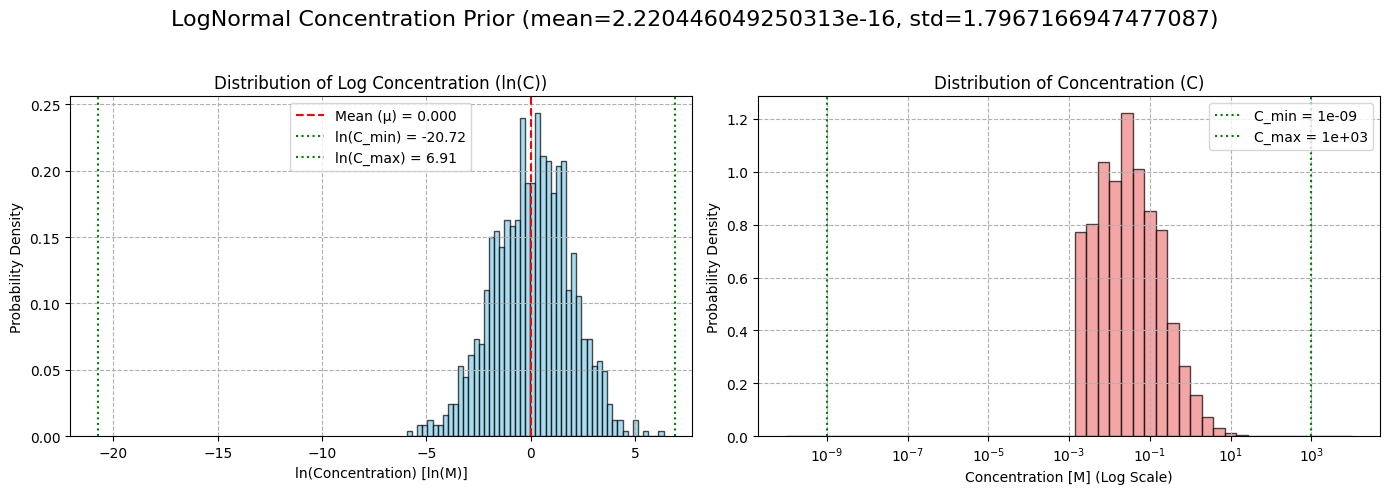

In [119]:
graph_ln_dist(log_dists[4].log_mean, log_dists[4].log_std)

In [135]:
from scripts.metabolite_utils import return_mets_tva
import scripts.metabolite_utils
importlib.reload(scripts.metabolite_utils)
from scripts.metabolite_utils import return_fluxes_tfva
import pandas as pd

r_ids = [r.id for r in tmodel.reactions]

r_indices = [tmodel.reactions.index(r) for r in tmodel.reactions]
m_indices = [tmodel.metabolites.index(m) for m in tmodel.metabolites]

m_names = [m.id for m in tmodel.metabolites]
bounds_m = return_mets_tva("tfva/ecoli_core_met_objval.txt")
print(bounds_m)

conc_bounds_df = pd.DataFrame(data=bounds_m,index=m_names, columns=['lb', 'ub'])
conc_bounds_df.to_csv(f"tfs/ecoli_core/lcb.csv")

bounds_f = return_fluxes_tfva("tfva/ecoli_core_flux_objval.txt")
flux_bounds_df = pd.DataFrame(data=bounds_f,index=r_ids, columns=['lb', 'ub'])
flux_bounds_df.to_csv(f"tfs/ecoli_core//vbounds.csv")

drg0_prime_mean_df = pd.DataFrame(data=drgs[0], index=r_indices, columns=['0'])
drg0_cov_sqrt_df = pd.DataFrame(data=drgs[1])
drg0_cov_df = pd.DataFrame(data=drgs[2])

drg0_prime_mean_df.to_csv(f"tfs/ecoli_core/drg0pm.csv")
drg0_cov_sqrt_df.to_csv(f"tfs/ecoli_core/drg0cs.csv")
#drg0_cov_df.to_csv(f"tfs/{CONDITION}/drg0c_test.csv")

log_mean_df = pd.DataFrame(data=np.array(conc_log_means), index=m_indices, columns=['0'])
log_cov_df = pd.DataFrame(data=np.array(conc_log_cov), index=m_indices, columns=['0'])

log_mean_df.to_csv(f"tfs/ecoli_core/lcm.csv")
log_cov_df.to_csv(f"tfs/ecoli_core/lcv_test.csv")

[(-16.11809565095769, -4.605170185988091), (-16.118095485961657, -4.605170189928818), (-16.118095588297304, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (0.0, -0.0), (0.0, -0.0), (0.0, -0.0), (0.0, -0.0), (-16.118095644560313, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.11809562825555, -4.605170185988091), (-16.11809564895051, -4.605170185988091), (-16.118095643429257, -4.605170186866615), (-16.11809565095832, -4.605170185988091), (-16.118095634395008, -4.605170185988091), (-16.118095362076208, -4.605170235300266), (-16.11809565095832, -4.605170185988091), (-16.11809561839381, -4.605170185988091), (-16.118095644821814, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.11809565095832, -4.605170185988091), (-16.118095650046477, -4.605170185988091), (-16.118095650925056, -4.605170187298622), (-16.118095650

In [108]:
ids = [x.id for x in tmodel.reactions if "biomass" in x.id or "EX_" in x.id or "BIOMASS" in x.id]

#print([x.id for x in tmodel.reactions])
print(ids)

['BIOMASS_Ecoli_core_w_GAM', 'EX_ac_e', 'EX_acald_e', 'EX_akg_e', 'EX_co2_e', 'EX_etoh_e', 'EX_for_e', 'EX_glc__D_e', 'EX_glu__L_e', 'EX_h_e', 'EX_h2o_e', 'EX_lac__D_e', 'EX_nh4_e', 'EX_o2_e', 'EX_pi_e', 'EX_pyr_e', 'EX_succ_e', 'biomass_ce', 'biomass_EX']


In [82]:
importlib.reload(scripts.tfs.preprocess)

<module 'scripts.tfs.preprocess' from '/home/laurens/MSC-Thermo/scripts/tfs/preprocess.py'>

GLCpts: glc__D_e + pep_c --> g6p_c + pyr_c


In [156]:
ranktol=1e-5

prep = preprocess.Preprocess(
    cobra_file="tfs/ecoli_core/ecoli_core.sbml",
    vbound_file="tfs/ecoli_core/vbounds.csv",
    logconcmean_file="tfs/ecoli_core/lcm.csv",
    logconcvar_file="tfs/ecoli_core/lcv_test.csv",
    lncbounds_file="tfs/ecoli_core/lcb.csv",
    drG0file="tfs/ecoli_core/drg0pm.csv",
    drGcovsqrtfile="tfs/ecoli_core/drg0cs.csv",
    drG0covfile=None#"tfs/drg0c_test.csv",
)

90
[]
[24, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 87, 88]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89]


In [157]:
thermodynamic_space = thermospace_mod.ThermodynamicSpaceMod(
    prep.Sconstrained,
    prep.rid_constrained,
    prep.model.metabolites,
    prep.drg0_prime_mean,
    prep.drg0_prime_cov_sqrt,
    prep.log_conc_cov,
    prep.log_conc_mean,
)


In [160]:

tbasis = tbasis_mod.ThermodynamicSpaceBasismod(
    thermodynamic_space,
    explicit_log_conc=True,
    explicit_drg0=True,
    explicit_drg=True,
    min_eigenvalue=1e-10,
    ranktol=ranktol,
    #ignoreconc_met_idx=prep.ignoreconc_met_idx,
)


[[ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 2.2204460

In [161]:
import pta
problem = pta.PmoProblem(prep.model, thermodynamic_space, tbasis, solver="GUROBI")

In [162]:
problem.solve(verbose=True)

(CVXPY) Jan 08 02:49:18 PM: Your problem has 271 variables, 537 constraints, and 0 parameters.
(CVXPY) Jan 08 02:49:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 08 02:49:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 08 02:49:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 08 02:49:18 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 08 02:49:18 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jan 08 02:49:18 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jan 08 02:49:18 PM: Applying reduction Dcp2Cone
(CVXPY) Jan 08 02:49:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 08 02:49:18 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jan 08 02:49:18 PM: Applying reduction GUROBI
(CVXPY) Jan 08 02:49:18 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.7.3                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter BarQCPConvTol to value 1e-08
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|A


    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
(CVXPY) Jan 08 02:49:18 PM: Problem status: infeasible_or_unbounded
(CVXPY) Jan 08 02:49:18 PM: Optimal value: nan
(CVXPY) Jan 08 02:49:18 PM: Compilation took 1.789e-02 seconds
(CVXPY) Jan 08 02:49:18 PM: Solver (including time spent in interface) took 3.032e-02 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


'infeasible_or_unbounded'